## Load Data

## fNIRS

In [1]:
from scipy.io import loadmat
import numpy as np
import mne
import matplotlib.pyplot as plt
import os

path = 'D:/One_한양대학교/private object minsu/coding/data/brain_2025'
datf = loadmat(f'{path}/mist_epoch.mat')
dat = loadmat(f'{path}/EEG_MIST.mat')

In [2]:
dat['epo'][0].dtype

dtype([('x', 'O'), ('y', 'O'), ('fs', 'O'), ('label', 'O')])

In [26]:
dat['epo']['x'][0][0].shape

(2, 35, 7, 30720)

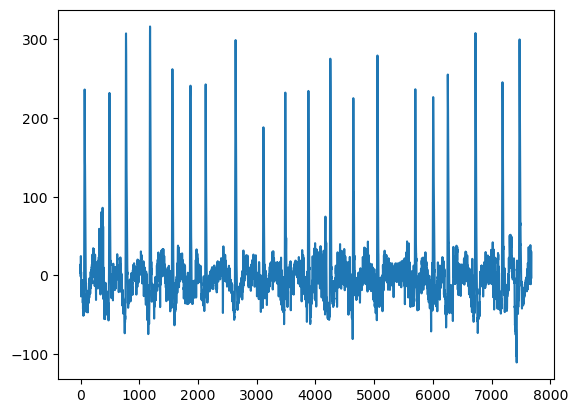

In [36]:
eeg = mne.filter.resample(dat['epo']['x'][0][0], down = 512 // 128)
eeg = np.swapaxes(eeg, 0, 1)
plt.plot(eeg[0,0,0])

In [ ]:
dat['epo']['label']

array([[array(['MISTMED'], dtype='<U7')]], dtype=object)

In [4]:
datf['data'][0][0].dtype

dtype([('eors1', 'O'), ('eors2', 'O'), ('eors3', 'O'), ('movie', 'O'), ('ID', 'O')])

In [50]:
for i in range(5):
    print(datf['data'][0][0][i][0][38].shape)

(1283, 26)
(367, 26)
(367, 26)
(1282, 26)
(1,)


In [54]:
fnirs_ = []
for i in [1,2]:
    temp = []
    for j in range(39):
        if j in [0, 3, 5, 10]: continue
        temp.append(datf['data'][0][0][i][0][j])
    fnirs_.append(np.stack(temp, axis=0))
fnirs_ = np.stack(fnirs_, 1)*1e+3
fnirs_ = np.swapaxes(fnirs_, 2, 3)

In [65]:
label = np.zeros((36,2))
label[:,1] = 1

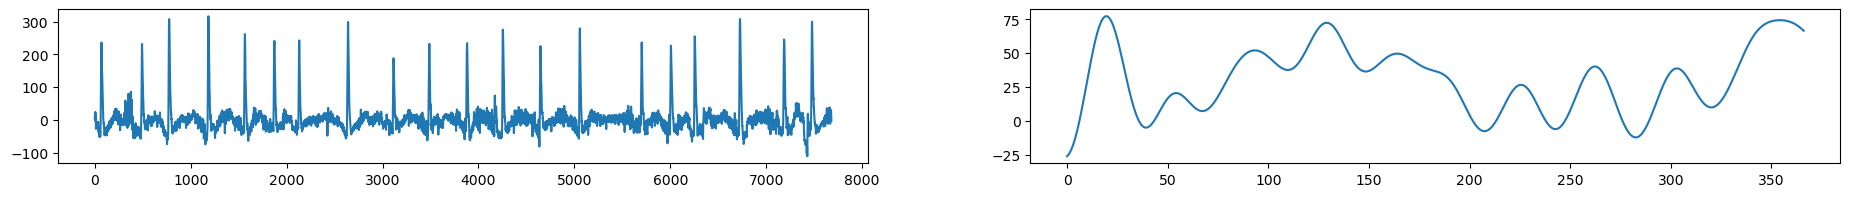

In [60]:
plt.figure(figsize=(23,2))
plt.subplot(121)
plt.plot(eeg[0,0,0])
plt.subplot(122)
plt.plot(fnirs_[0,0,0])

In [66]:
np.savez_compressed('mist_data.npz', eeg=eeg, fnirs=fnirs_, label=label)